# 시계열 자료와 확률 과정

## 확률 과정

**확률 과정(Stochastic process, Random process)**은 상호 상관 관계를 가지는 무한 개의 확률 변수의 순서열을 말한다. 확률 과정에 포함된 확률 변수는 시간 인덱스  $t$에 의해 정렬되어 있다.

 $$ Y = \{ \cdots, Y_{-2}, Y_{-1}, Y_0, Y_1, Y_2, \cdots \} $$

**시계열 자료(time series data)**란 이러한 확률 과정의 샘플이다.

$$ y = \{ \cdots, y_{-2}, y_{-1}, y_0, y_1, y_2, \cdots \} $$

시계열 자료는 다음과 같이 표기하기도 한다.

$$ \{ y_t: t=\cdots, -2, -1, 0, 1, 2, \cdots \} $$

만약 시간 인덱스 $t$를 정수만 사용한다면 이산 시간 확률 과정(discrete time stochastic process)이라고 한다. 일반적인 시계열 분석에서는 이산 시간 확률 과정을 다루지만 금융 파생 상품의 가결 결정 이론 등에서는 시간 인덱스가 임의의 실수가 될 수 있는 연속 시간 확률 과정(continuous time stochastic process)도 다룬다.

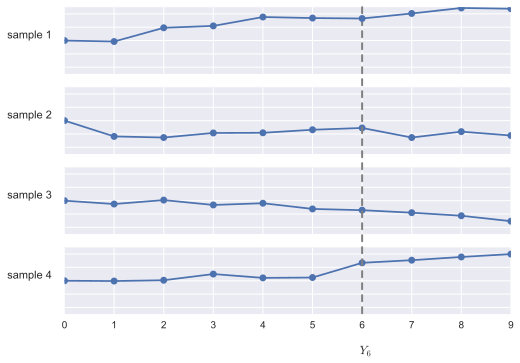

In [73]:
t = np.arange(10)
np.random.seed(99)
y1 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y2 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y3 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y4 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)

ax1 = plt.subplot(4, 1, 1)
ax1.plot(t, y1, '-o')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(-5, 5)
ax1.set_zorder(2)
ax1.set_ylabel("sample 1").set_rotation(0)
ax1.yaxis.set_tick_params(pad=30)

ax2 = plt.subplot(4, 1, 2)
ax2.plot(t, y2, '-o')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(-5, 5)
ax2.set_zorder(1)
ax2.set_ylabel("sample 2").set_rotation(0)
ax2.yaxis.set_tick_params(pad=30)

ax3 = plt.subplot(4, 1, 3)
ax3.plot(t, y3, '-o')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_ylim(-5, 5)
ax3.set_zorder(1)
ax3.set_ylabel("sample 3").set_rotation(0)
ax3.yaxis.set_tick_params(pad=30)

ax4 = plt.subplot(4, 1, 4)
ax4.plot(t, y4, '-o')
ax4.set_yticklabels([])
ax4.set_ylim(-5, 5)
ax4.set_zorder(1)
ax4.set_ylabel("sample 4").set_rotation(0)
ax4.yaxis.set_tick_params(pad=30)
ax4.annotate('$Y_6$', xy=(6 - 0.05, -11), xycoords='data', annotation_clip=False)

from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(6,5), xyB=(6,-5), ls="--", lw=2, color="gray", 
                      coordsA="data", coordsB="data", axesA=ax1, axesB=ax4)
ax1.add_artist(con);

예를 들어 특정 회사의 주가를 시계열 자료로 보고 이 시계열 자료가 확률 과정이라고 가정하면 우리가 보는 주가 경로 전체가 확률 과정에서 나올 수 있는 하나의 샘플일 뿐이다. 즉, 우리가 살고 있는 이 세계(지금 보고 있는 바로 그 주가 자료를 가지고 있는 세계) 자체가 확률 과정의 **하나의 샘플**이다.

이렇게 본다면 아직 실현되지 않은 미래의 주가는 어떻게 생각 할 수 있을까? 확률 과정의 샘플은 음의 무한대부터 양의 무한대까지 모든 시간에 대한 자료를 가지고 있으므로 미래의 주가도 이미 실현(샘플링)되어 있는 것으로 생각하면 이해하기 쉽다. 이러한 관점으로 보면 미래는 전체 시계열 자료 중 현재 시점에서 아직 관찰이 불가능한 부분일 뿐이다.

이러한 관점은 연속시간 확률과정을 분석할 때 중요한 역할을 한다. 그러나 이산시간 확률과정의 경우에는 단순히 **서로 상관관계를 가지는 복수개의 확률변수**로 보아도 큰 문제가 없다.

## 앙상블 평균

이러한 관점에서 확률 과정 $Y$의 특정 시간에 대한 기댓값 $\text{E}[Y_t]$은 이렇게 생성된 복수의 시계열 자료 샘플에서 특정 시간 $t$의 값만을 평균한 것으로 볼 수 있다. 이를 시계열의 **앙상블 평균**(ensemble average)라고 한다. 

재현이 가능한 확률 과정, 예를 들어 반복하여 시행할 수 있는 실험(experiment)의 데이터와 같은 경우에는 앙상블 평균의 추정값을 계산할 수 있다. 하지만  재현이 불가능한 확률 과정에 대해서는 특정시간의 값에 대한 앙상블 평균의 추정값은 현실적으로 얻을 수 없다. 이 경우 우리가 살고 있는 세계는 **하나의 샘플만을 가진 세계**이기 때문이다.

앙상블 평균에 대한 추정값을 얻기 위해서는 확률 과정이 정상 과정(stationary process)이며 에르고딕 과정(ergodic process)이라는 가정이 있어야 한다. 정상 과정과 에르고딕 과정에 대해서는 추후 자세히 설명한다.

## 확률 과정의 기댓값, 자기공분산, 자기상관계수

확률 과정의 특성은 개별 시간 인덱스에 대한 확률 변수들의 결합 확률 밀도 함수를 사용하여 정의한다.

**확률 과정의 기대값**은 보통 $\mu_t$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$의 기댓값이다.

$$ \mu_t = \text{E}[Y_t] $$

**확률 과정의 자기공분산(auto-covariance)**은 보통 $\gamma_{t,s}$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$와 시간 인덱스 $s$에 대한 확률 변수 $Y_s$의 공분산이다. 

$$ \gamma_{t,s} = \text{Cov}[Y_t, Y_s]  = \text{E}\left[(Y_t-\text{E}[Y_t])(Y_s-\text{E}[Y_s])\right] $$


**확률 과정의 자기상관계수(auto-correlation)**은 보통 $\rho_{t,s}$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$와 시간 인덱스 $s$에 대한 확률 변수 $Y_s$의 상관계수이다. 

$$ \rho_{t,s} = \text{Corr}[Y_t, Y_s] = \dfrac{ \text{Cov}[Y_t, Y_s] }{\sqrt{\text{Var}[Y_t]\text{Var}[Y_s]}} = \dfrac{\gamma_{t,s}}{\sqrt{\gamma_t\gamma_s}} $$


위의 정의에서 다음과 같은 성질을 만족함을 알 수 있다.

$$
\begin{eqnarray}
\gamma_{t,t} &=& \text{Var}[Y_t] \\
\gamma_{t,s} &=& \gamma_{s,t} \\
\left| \gamma_{t,s} \right| &\leq& \sqrt{\gamma_{t,t} \gamma_{s,s} } \\
\rho_{t,t} &=& 1 \\
\rho_{t,s} &=& \rho_{s,t} \\
\left| \rho_{t,s} \right| &\leq& 1 \\
\end{eqnarray}
$$